In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your dataset
data_dir = "C:/Users/rmano/OneDrive/Desktop/newdatacropped"
train_dir = "C:/Users/rmano/OneDrive/Desktop/owndatafolder/train"
test_dir ="C:/Users/rmano/OneDrive/Desktop/owndatafolder/test"

# Create training and testing directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each label (0 to 9)
for label in range(10):
    label_folder = os.path.join(data_dir, str(label))
    images = os.listdir(label_folder)
    
    # Split images into train and test
    train_images, test_images = train_test_split(images, test_size=0.2,random_state=42)
    
    # Move images to respective train and test directories
    for img in train_images:
        src = os.path.join(label_folder, img)
        dst = os.path.join(train_dir, str(label), img)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
        
    for img in test_images:
        src = os.path.join(label_folder, img)
        dst = os.path.join(test_dir, str(label), img)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = 'C:/Users/rmano/OneDrive/Desktop/owndatafolder/train'
test_data_dir = 'C:/Users/rmano/OneDrive/Desktop/owndatafolder/test'




In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# Define image dimensions
img_width, img_height = 150,150

# Create the ImageDataGenerator for grayscale images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)
# Extract data from the generators
def extract_data(generator):
    X, y = [], []
    for _ in range(len(generator)):
        images, labels = next(generator)
        X.extend(images)
        y.extend(labels)
    return np.array(X), np.array(y)

# Convert training and validation data to numpy arrays
X_train, y_train = extract_data(train_generator)
X_test, y_test = extract_data(validation_generator)
# Verify the shapes of the extracted data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')



Found 1173 images belonging to 10 classes.
Found 382 images belonging to 10 classes.
X_train shape: (1173, 150, 150, 3)
y_train shape: (1173, 10)
X_test shape: (382, 150, 150, 3)
y_test shape: (382, 10)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image dimensions
img_width, img_height = 150, 150

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


C:\Users\rmano\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\rmano\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 845ms/step - accuracy: 0.3751 - loss: 1.9248 - precision: 0.6314 - recall: 0.2482 - val_accuracy: 0.9062 - val_loss: 0.1747 - val_precision: 0.9327 - val_recall: 0.9062
Epoch 2/10
 1/36 ━━━━━━━━━━━━━━━━━━━━ 25s 730ms/step - accuracy: 0.9375 - loss: 0.1776 - precision: 0.9355 - recall: 0.9062

C:\Users\rmano\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9375 - loss: 0.1776 - precision: 0.9355 - recall: 0.9062 - val_accuracy: 0.9667 - val_loss: 0.0787 - val_precision: 0.9667 - val_recall: 0.9667
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 746ms/step - accuracy: 0.9553 - loss: 0.1471 - precision: 0.9579 - recall: 0.9468 - val_accuracy: 0.9972 - val_loss: 0.0083 - val_precision: 0.9972 - val_recall: 0.9972
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0181 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0034 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 779ms/step - accuracy: 0.9790 - loss: 0.0717 - precision: 0.9806 - recall: 0.9783 - val_accuracy: 0.9943 - val_loss: 0.0130 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.0825 - precision: 0.9375 - recall: 0.9375 - val_accuracy: 1.0000 - val_loss: 0.0014 - val_prec

In [7]:
model.save('my_model_final.keras')


In [8]:
from tensorflow.keras.models import load_model

model=load_model("my_model_final.keras")

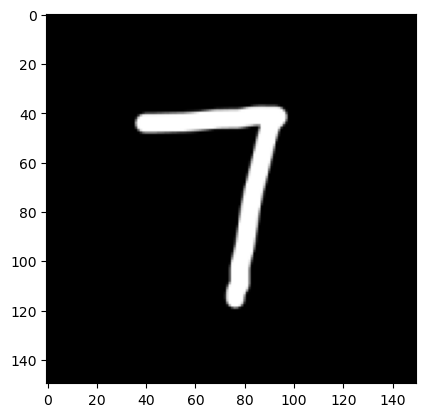

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[6.1244704e-05 9.3736116e-06 2.9861735e-04 9.8983401e-05 1.5293568e-04
  7.6621535e-07 2.2332159e-04 9.9857414e-01 5.7948416e-04 1.0965588e-06]]
The predicted class is: 7


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Preprocess and predict function
def preprocess_and_predict_image(model, img_path, target_size):
    # Read the image using OpenCV in grayscale mode
    test_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to the target size
    img_resized = cv2.resize(test_image, target_size, interpolation=cv2.INTER_AREA)
    
    # Invert the image if necessary
    img_resized = cv2.bitwise_not(img_resized)
    
    # Convert the grayscale image to RGB by duplicating the single channel
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    plt.imshow(img_rgb)
    
    # Display the preprocessed image (optional)
    plt.imshow(img_rgb)
    plt.show()
    
    # Normalize the image
    img_rgb = img_rgb / 255.0
    
    # Add the batch dimension
    img_rgb = np.expand_dims(img_rgb, axis=0)
    
    # Predict the class
    prediction = model.predict(img_rgb)
    print(prediction)
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class

# Define the target size (should be the same as the input size of the model)
img_width, img_height = 150, 150 # Update these values as needed
target_size = (img_width, img_height)

# Path to the user-provided image
img_path="C:/Users/rmano/OneDrive/Pictures/Screenshots/Screenshot 2024-06-26 192310.png"

# Load the trained model (if not already loaded)
model = load_model("my_model_final.keras")  # Update the path to your model

# Predict the class
predicted_class = preprocess_and_predict_image(model, img_path, target_size)

# Assuming train_generator is already defined and trained
# Map the predicted class index to the actual class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Confusion Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 35]]


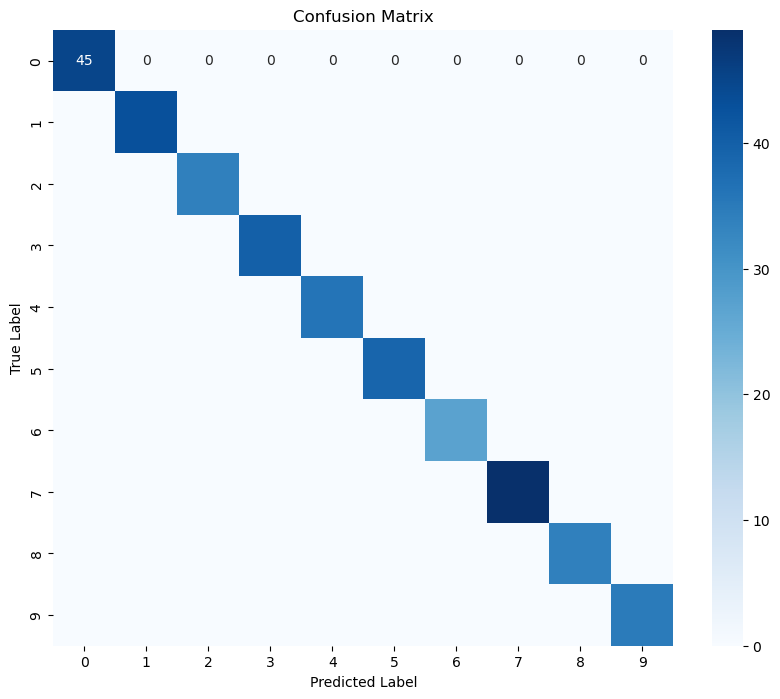

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Collect true labels and predicted labels for test images
true_labels = []
predicted_labels = []

# Assuming test_generator is already defined and provides batches of test images
for i in range(len(validation_generator)):
    x_batch, y_batch = validation_generator[i]
    y_true = np.argmax(y_batch, axis=1)
    y_pred = np.argmax(model.predict(x_batch), axis=1)
    true_labels.extend(y_true)
    predicted_labels.extend(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import pickle

# Specify the filename
filename = 'digit.pkl'

# Open a file in binary mode and write the model to it
with open(filename, 'wb') as file:
    pickle.dump(model,file)